<a href="https://colab.research.google.com/github/panzershracker/Deep-learning-in-comp.-vision/blob/master/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
%matplotlib inline 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [82]:
tf.__version__

'2.2.0'

# Загрузка и подготовка датасета cifar-10

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [108]:
X_train.shape,  y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [109]:
X_train = X_train.reshape(-1, 32, 32, 3).astype(np.float32) / 255
X_test = X_test.reshape(-1, 32, 32, 3).astype(np.float32) / 255

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

# Визуализация cifar-10

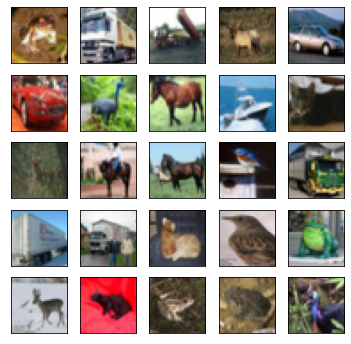

In [89]:
fig = plt.figure(figsize=(6,6))

for i in range(25):
  ax = fig.add_subplot(5, 5, i+1)
  ax.imshow(X_train[i])
  plt.xticks([]), plt.yticks([])
plt.show()

# Построение модели

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2), (2,2)),
                                    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2), (2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')                                 
])

# Подготовка к обучению

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
EPOCHS = 10

model.fit(X_train, y_train, epochs=EPOCHS)

Epoch 1/10
1563/1563 [==============================] - 166s 106ms/step - loss: 1.3023 - accuracy: 0.5364
Epoch 2/10
1563/1563 [==============================] - 167s 107ms/step - loss: 1.0181 - accuracy: 0.6414
Epoch 3/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.8520 - accuracy: 0.7006
Epoch 4/10
1563/1563 [==============================] - 169s 108ms/step - loss: 0.7272 - accuracy: 0.7442
Epoch 5/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.6026 - accuracy: 0.7880
Epoch 6/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.4972 - accuracy: 0.8218
Epoch 7/10
1563/1563 [==============================] - 169s 108ms/step - loss: 0.3956 - accuracy: 0.8597
Epoch 8/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.3088 - accuracy: 0.8915
Epoch 9/10
1563/1563 [==============================] - 166s 106ms/step - loss: 0.2527 - accuracy: 0.9104
Epoch 10/10
1563/1563 [=======================

In [110]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 30ms/step - loss: 1.5618 - accuracy: 0.6787


[1.5618078708648682, 0.6786999702453613]